# Practical Machine Learning for Physicists
## Week 2 Exercise - Part 1
## Deadline Monday 9th November at 12pm (Noon)

### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


# Task 1

Firstly let's import the modules we need

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.7.0


### Importing MNIST

Now let's import the MNIST dataset

In [3]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# get pixel values from range [0,255] to range [0,1]
train_images=train_images/255.0
test_images=test_images/255.0

11501568/11490434 [==============================] - 1s 0us/step


Now we need to reshape the dimension of the images we will input to our model

In [4]:
train_images = tf.expand_dims(train_images, axis=-1)  # reshaping input train images
test_images =  tf.expand_dims(test_images, axis=-1)   # reshaping test images

2021-12-27 12:17:42.513838: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Build the model

Now we will define our model, it will have a single convolutional layer and one pooling layer.

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(18, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 18)        180       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 18)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3042)              0         
                                                                 
 dense (Dense)               (None, 30)                91290     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 91,780
Trainable params: 91,780
Non-trainable params: 0
____________________________________________________

### Train the model

Now what is left to do is compiling and training our model

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels),steps_per_epoch=500)

Epoch 1/5
500/500 [==============================] - 7s 13ms/step - loss: 0.3005 - accuracy: 0.9173 - val_loss: 0.1168 - val_accuracy: 0.9662
Epoch 2/5
500/500 [==============================] - 6s 12ms/step - loss: 0.0922 - accuracy: 0.9739 - val_loss: 0.0691 - val_accuracy: 0.9779
Epoch 3/5
500/500 [==============================] - 6s 13ms/step - loss: 0.0663 - accuracy: 0.9808 - val_loss: 0.0703 - val_accuracy: 0.9775
Epoch 4/5
500/500 [==============================] - 6s 12ms/step - loss: 0.0543 - accuracy: 0.9840 - val_loss: 0.0522 - val_accuracy: 0.9843
Epoch 5/5
500/500 [==============================] - 6s 12ms/step - loss: 0.0457 - accuracy: 0.9866 - val_loss: 0.0527 - val_accuracy: 0.9814


In [7]:
print(train_labels[:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


### Evaluate Performance

Finally let's evaluate the model performance

313/313 - 0s - loss: 0.1139 - accuracy: 0.9732


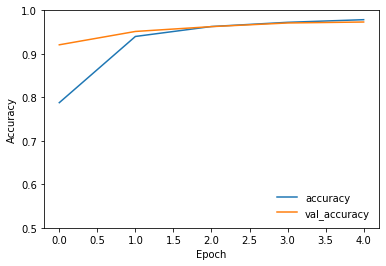

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

As we can see from the plot above, the train accuracy and the test accuracy seem to reach an asymptotic region as the training epochs increase.

In particular I noticed that if I kept training the model for more epochs, or more steps, I could not never go above an test accuracy above 98%, and eventually the at a certain point the test accuracy started decreasing with more training. As a matter of fact the result of more training was only a higher training accuracy which points out to over-fitting of the training dataset. 

As we can see at the far right of the plot, the train accuracy is about to overcome the test accuracy, signaling that further training would now lead to over-fitting instead of higher test accuracy, which as reached his maximum value. 

I chose to use a convolutional layer with 18 filters and a 3x3 kernel, and a dense layer of 30 neurons, to achieve model that could reach a test accuracy close to 98%, and do so with a number of parameters < 100,000. The number of parameters is a direct estimation of the computing power the model requires. I also added a pooling layer with a 2x2 kernel do drastically reduce the number of parameters.

finally I trained the model for 5 epochs and 500 steps per epoch. I found that these values allow to quickly achieve a high test accuracy in about 30 seconds of training, and stop the training just before over-fitting starts to happen. 

## Task 2

### Build the model

Now we will use more convolutional layers in our model

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(18, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(10))

model.summary()


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels),steps_per_epoch=500)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 18)        180       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 18)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 11, 11, 28)        4564      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 28)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 3, 28)          7084      
_________________________________________________________________
flatten_22 (Flatten)         (None, 252)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 30)              

313/313 - 0s - loss: 0.0501 - accuracy: 0.9839


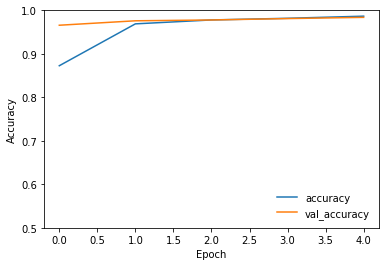

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

As we can see from the plot above, the train accuracy and the test accuracy seem to reach an asymptotic region as the training epochs increase.

In particular I noticed that if I kept training the model for more epochs, or more steps, I could not never go above an test accuracy above 99%, and eventually the at a certain point the test accuracy started decreasing with more training. As a matter of fact the result of more training was only a higher training accuracy which points out to over-fitting of the training dataset. 

In this case adding arbitrarily more convolutional layers lead only to an increase of about 1% in the maximum test accuracy that we can achieve.

As we can see at the far right of the plot, the train accuracy is about to overcome the test accuracy, signaling that further training would now lead to over-fitting instead of higher test accuracy, which as reached his maximum value. 

I chose to use 3 convolutional layer with progressively more filters and a 3x3 kernel, and a dense layer of 30 neurons, to achieve model that could reach a test accuracy above 98%%, and do so with a number of parameters < 20,000. Since the number of parameters is a direct estimation of the computing power the model requires, this model with 3 convolutional is more computationally efficient than the one layer model which used 5 times as many parameters

Finally increasing the number of convolutional and pooling layers allow to achieve a similar test accuracy however with a much smaller number of parameters, hence making the model more efficient.